## 품목별 소비자물가지수(품목성질별: 2015=100)
* 국내통계 > 주제별 통계 > 물가 > 품목별 소비자물가지수(품목성질별: 2015=100)
* https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J17112&conn_path=I2

<img src="https://i.imgur.com/TDNOdE7.jpg">

### ⚠️주의⚠️분석 내용은 2015=100 기준이며, 추후 실습시에는 해당 시기에 맞게 분석해 보세요!

```
통계청은 최근의 소비구조 변화를 반영한 2020년 기준 소비자물가지수 개편 결과를 아래와 같이 공표예정입니다.
- 2020년 기준 소비자물가지수 개편결과* 공표 : 2021.12.22.(수)

* 품목 및 가중치 개편, 개편효과, ’21.11월 이전 지수 ’20년 기준으로 변경 등

- 2020년 기준 2021년 12월 및 연간 물가동향 공표 : 2021.12.31.(금)

이에 따라 소비자물가지수 통계표는 2020년 기준(2020=100)으로 2021.12. 22.(수)에 변경되며, 현재 제공되는 2015년 기준(2015=100) 통계표는 향후 제공되지 않습니다.
소비자물가지수 통계표를 활용하는 이용자는 참고하시기 바랍니다.
```

In [1]:
# 📂 데이터 분석을 위해 pandas, numpy
# 시각화를 위해 matplotlib, seaborn 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  ⚙️ 시각화를 위한 글꼴 설정

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
    # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

In [4]:
# 📤 KOSIS에서 다운받은 .csv 파일을 df_price_index 변수에 담아 불러옵니다.
# 품목별_소비자물가지수_품목성질별_2015100__20211007111659.csv

df_price_index = pd.read_csv("kosis_customer_price_2015100.csv", encoding="cp949")
df_price_index.shape

(12150, 4)

In [5]:
# 🧾 불러온 데이터가 몇 개의 데이터로 구성되어있는지, 타입은 무엇인지 확인합니다.
#     - '시점', '시도별', '품목별', '데이터' 총 4개의 칼럼으로 구성되어 있고, 각각 12150개의 행을 갖고 있습니다.
#     - '시점', '시도별', '품목별' 데이터는 object 타입이며, '데이터'는 float64 타입입니다. 
df_price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      12150 non-null  object 
 1   시도별     12150 non-null  object 
 2   품목별     12150 non-null  object 
 3   데이터     12150 non-null  float64
dtypes: float64(1), object(3)
memory usage: 379.8+ KB


## 소비자 물가 추이
### 전년 동월 대비 소비자물가 데이터 전처리

In [6]:
# 📰 기사의 전년 동월 대비 소비자 물가를 구해야 합니다.
#     - df_price_index의 '품목별' 컬럼 안에서 '총지수'라는 단어를 포함하는 데이터들을 df_price 변수에 담습니다.
#     - '시점'을 기준으로 값들을 정렬한 후, 품목별로 데이터들을 묶습니다. 그 후, pct_change() 함수를 활용하여 
#       전년도의 총지수 데이터와 비교한 값을 '전년동월대비' 컬럼으로 생성합니다.
#       pct_change() 함수에 대한 더 자세한 사항은 다음을 참고하세요.
#       🔍 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html
#     - df_price 변수에 새로운 컬럼인 '전년동월대비'가 생성되었는지 확인합니다.

df_price = df_price_index[df_price_index["품목별"] == "총지수"].copy()
df_price["전년동월대비"] = df_price["데이터"].pct_change(periods=12) * 100
df_price

,시점,시도별,품목별,데이터,전년동월대비
0,2019. 09,전국,총지수,105.20,NaN
486,2019. 10,전국,총지수,105.46,NaN
972,2019. 11,전국,총지수,104.87,NaN
1458,2019. 12,전국,총지수,105.12,NaN
1944,2020. 01,전국,총지수,105.79,NaN
2430,2020. 02,전국,총지수,105.80,NaN
2916,2020. 03,전국,총지수,105.54,NaN
3402,2020. 04,전국,총지수,104.95,NaN
3888,2020. 05,전국,총지수,104.71,NaN
4374,2020. 06,전국,총지수,104.87,NaN


In [7]:
# ✂️ NaN(= Not-A-Number(숫자가 아님))값이 포함된 행을 삭제합니다.
#     - 2019년도 데이터는 전년도 데이터가 존재하지 않아 함수에서 계산이 되지 않아 NaN값으로 표시됩니다. 
#       따라서, NaN 값을 포함한 행을 삭제해 줍니다.
#     - df_price_notnan 변수에 NaN이 없는 데이터들을 담아줍니다.

df_price_notnan = df_price.dropna()
df_price_notnan

,시점,시도별,품목별,데이터,전년동월대비
5832,2020. 09,전국,총지수,106.20,0.950570
6318,2020. 10,전국,총지수,105.61,0.142234
6804,2020. 11,전국,총지수,105.50,0.600744
7290,2020. 12,전국,총지수,105.67,0.523212
7776,2021. 01,전국,총지수,106.47,0.642783
8262,2021. 02,전국,총지수,107.00,1.134216
8748,2021. 03,전국,총지수,107.16,1.534963
9234,2021. 04,전국,총지수,107.39,2.324917
9720,2021. 05,전국,총지수,107.46,2.626301
10206,2021. 06,전국,총지수,107.39,2.402975


### 전년 동월 대비 소비자물가 데이터 시각화

<img src="https://i.imgur.com/TDNOdE7.jpg" width="500">

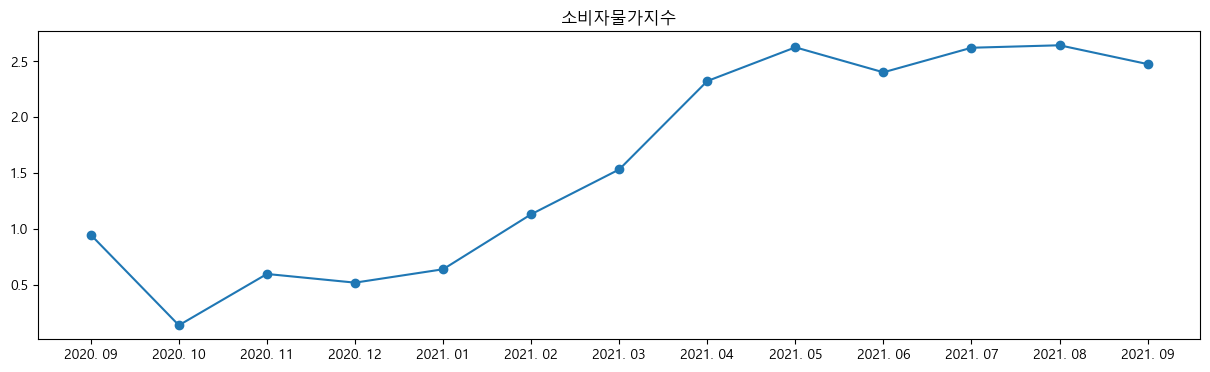

In [8]:
# 📈✏️ 선 그래프로 나타내기 1
#     - plt.figure() : 캔버스를 생성, figsize를 통해 캔버스의 사이즈를 설정해 줍니다.
#     - plt.plot() : '시점'컬럼의 값을 x축, '전년동월대비'컬럼의 값을 y축으로 설정하고 값들을 동그란 원으로 표시하기 위해 marker를 
#       설정해줍니다.
#     - plt.xticks() : '시점'컬럼의 해당하는 값들의 글자가 겹쳐 잘 보이지 않을 수도 있어 rotation 을 설정하여 글자를 약간 기울여줍니다.
#     - plt.title() : 그래프의 제목을 '소비자물가지수'로 표시하고 글자 크기는 20px로 설정해줍니다.
#     - plt.show() : 그래프를 나타내줍니다.
plt.figure(figsize=(15, 4))
plt.plot(df_price_notnan["시점"], df_price_notnan["전년동월대비"], marker="o")
plt.title("소비자물가지수")
plt.show()

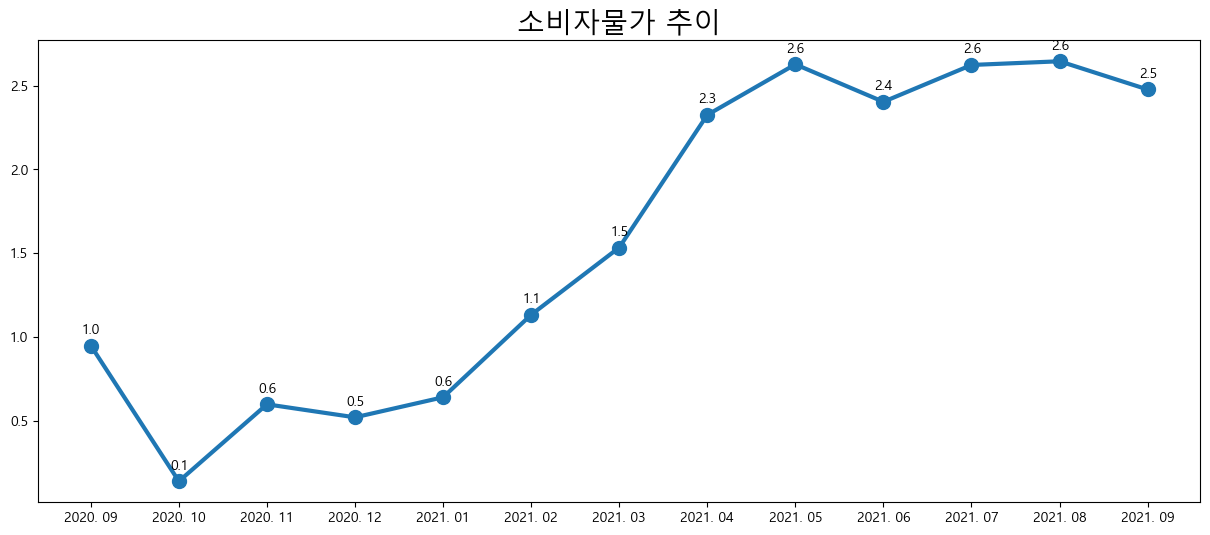

In [9]:
# 📈✏️ 선 그래프로 나타내기 2
# - fig와 ax 객체에 각각 캔버스와 프레임을 생성해 줍니다.
# 더 자세한 그래프의 이해는 Anatomy of a figure(https://matplotlib.org/stable/gallery/showcase/anatomy.html)를 참고하세요.

# 캔버스 생성
fig = plt.figure(figsize=(15, 6))
# 서브플롯 생성
ax = fig.add_subplot() 
# 마커모양 및 사이즈, 선굵기 설정
line_plot = ax.plot(df_price_notnan['시점'],
                    df_price_notnan['전년동월대비'], 
                    marker = 'o', 
                    markersize = 10 , 
                    linewidth = 3) 
# 선 그래프 요소                                      
line_plot = line_plot[0] 
# 선 그래프 텍스트 출력하기
for price_index in list(line_plot.get_xydata()):
    ax.text(x=price_index[0] - 0.1, y=price_index[1]+0.07, s=f"{price_index[1]:.1f}")
    # price_index[0] : x축을 기준, price_index[1] : y축을 기준으로 위치를 지정하여 글자를 넣어줍니다.
    # f'{float(price_index[1]):.1f}' : 실수 소수점 첫째자리까지 표시해 줍니다.
                         
# 그래프 제목지정
plt.title('소비자물가 추이',fontsize = 20)
plt.show()

## 주요 품목 상승률
### 주요 품목 상승률 전처리 
* 달걀, 상추, 마늘, 돼지고기, 라면, 경유, 휘발유, 집 전세

<img src="https://i.imgur.com/TDNOdE7.jpg" width="500">

In [10]:
# 📰 주요 품목 상승률 구합니다.
# df_price_index의 '품목별' 컬럼 안에서 '달걀', '상추', '마늘', '돼지고기', '라면', '경유', '휘발유', '전세' 라는 
# 단어를 포함하는 데이터들을 df_import 변수에 담습니다.
df_import = df_price_index[df_price_index["품목별"].isin(['달걀', '상추', '마늘', '돼지고기', 
                                           '라면', '경유', '휘발유', '전세'])].copy()

In [11]:
# 파생변수 만들기
# - '시점'을 기준으로 값들을 정렬한 후, 품목별로 데이터들을 묶습니다. 
# - 그리고 pct_change() 함수를 활용하여 전년도의 주요 품목들의 데이터와 비교한 값을 
# '전년동월대비' 컬럼으로 생성합니다. 기사내용과 같게 하기 위해 100을 곱해줍니다.
# - df_import 변수에 새로운 컬럼인 '전년동월대비'가 생성되었는지 확인합니다.
df_import["전년동월대비"] = df_import.sort_values(by="시점").groupby("품목별")["데이터"].pct_change(periods=12) * 100
df_import

,시점,시도별,품목별,데이터,전년동월대비
12,2019. 09,전국,상추,162.73,NaN
33,2019. 09,전국,마늘,91.98,NaN
62,2019. 09,전국,돼지고기,106.78,NaN
64,2019. 09,전국,달걀,95.74,NaN
85,2019. 09,전국,라면,104.47,NaN
...,...,...,...,...,...
11728,2021. 09,전국,달걀,149.63,43.419918
11749,2021. 09,전국,라면,115.14,9.845449
11902,2021. 09,전국,휘발유,108.64,20.979955
11903,2021. 09,전국,경유,110.25,23.792949


In [12]:
# df_import의 '시점'의 데이터들 중 '2021.09' 값을 포함한 값들만을 df_product 변수에 담아줍니다.
df_product = df_import[df_import["시점"] == "2021. 09"].copy()
df_product

,시점,시도별,품목별,데이터,전년동월대비
11676,2021. 09,전국,상추,265.09,35.312133
11697,2021. 09,전국,마늘,137.29,16.436265
11726,2021. 09,전국,돼지고기,133.65,16.379310
11728,2021. 09,전국,달걀,149.63,43.419918
11749,2021. 09,전국,라면,115.14,9.845449
11902,2021. 09,전국,휘발유,108.64,20.979955
11903,2021. 09,전국,경유,110.25,23.792949
11993,2021. 09,전국,전세,110.90,2.362932


In [13]:
# '전년동월대비' 값을 기준으로 내림차순으로 정렬해 줍니다.
df_product.sort_values("전년동월대비", ascending=False)

,시점,시도별,품목별,데이터,전년동월대비
11728,2021. 09,전국,달걀,149.63,43.419918
11676,2021. 09,전국,상추,265.09,35.312133
11903,2021. 09,전국,경유,110.25,23.792949
11902,2021. 09,전국,휘발유,108.64,20.979955
11697,2021. 09,전국,마늘,137.29,16.436265
11726,2021. 09,전국,돼지고기,133.65,16.379310
11749,2021. 09,전국,라면,115.14,9.845449
11993,2021. 09,전국,전세,110.90,2.362932


### 주요 품목 상승률 시각화 - 달걀, 상추, 마늘, 돼지고기, 라면, 경유, 휘발유, 집 전세

C:\Users\do543\AppData\Local\Temp\ipykernel_11020\1150887197.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_product, x="전년동월대비", y="품목별", order=order_list, palette="Oranges_r")


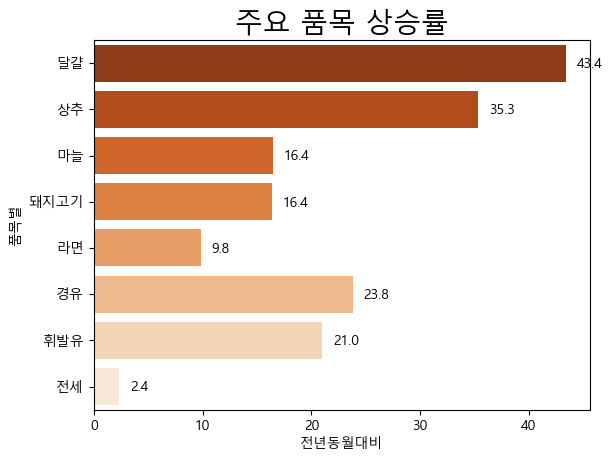

In [14]:
# 📈✏️ 막대 그래프로 나타내기
#    - fig와 ax 객체에 각각 캔버스와 프레임을 생성해 줍니다.

order_list = ['달걀', '상추', '마늘', '돼지고기', '라면', '경유', '휘발유', '전세']

# 캔버스 생성
# seaborn 라이브러리의 barplot을 사용하여 x축은 '전년동월대비', y축은 '품목별' 데이터로 막대그래프를 그려줍니다.
# order을 사용하여, 품목들의 표시 순서를 정해줍니다.
ax = sns.barplot(data=df_product, x="전년동월대비", y="품목별", order=order_list, palette="Oranges_r")
# ax.patches는 ax의 그래프 막대를 담고 있는 리스트입니다.

for patch in ax.patches:
    x, y, width, height = patch.get_bbox().bounds
    ax.text(x=width+1, y=y+0.5, s=f"{width:.1f}")
    
# patch.get_bbox().bounds를 통해 막대그래프의 정보를 나타냅니다.
# ax.text(x, y, s) - 그래프에 값들을 표시해 줄 위치를 지정합니다.

plt.title("주요 품목 상승률", fontsize=20)
plt.show()

<img src="https://i.imgur.com/TDNOdE7.jpg" width="700">